In [1]:
# v7, only cpl, coast and synch. write out for all fits are at the end now. cpl norm mle added to write out.

%reset -f
from IPython.display import clear_output
clear_output(wait=True)

In [1]:
epk_init = 174
alpha_init = -0.07

In [2]:
pwd

u'/Users/monad/Documents/multinest_proj/090530760'

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

import warnings
warnings.simplefilter('ignore')

from threeML import *
from threeML.io.package_data import get_path_of_data_file

from astromodels.functions.function import Function1D, FunctionMeta, ModelAssertionViolation

import os
os.environ["MKL_NUM_THREADS"] = '1'
os.environ["OMP_NUM_THREADS"] = '1'
os.environ["NUMEXPR_NUM_THREADS"] = '1'


INFO:keyring.backend:Loading KWallet
INFO:keyring.backend:Loading SecretService
INFO:keyring.backend:Loading Windows
INFO:keyring.backend:Loading chainer
INFO:keyring.backend:Loading macOS

WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [4]:
gbmCatalog = FermiGBMBurstCatalog()

In [5]:
grbNumber = '090530760'
gbmCatalog.query_sources('GRB'+grbNumber)

name,ra,dec,trigger_time,t90
object,float64,float64,float64,float64
GRB090530760,73.200,13.800,54981.760005,157.699


In [6]:
# burst information to check

burstInformation = gbmCatalog.get_detector_information()
burstInformation.values()

# detectors: n8, n4, n7, b0

[{'background': {'full': '-53.750000--11.250000,295.000000-345.000000',
   'post': '295.000000-345.000000',
   'pre': '-53.750000--11.250000'},
  'best fit model': {'fluence': 'band', 'peak': 'comp'},
  'dec': 13.8,
  'detectors': array(['n1', 'n2', 'n5', 'b0'], dtype='|S2'),
  'ra': 73.2,
  'source': {'fluence': '3.328000-161.027000', 'peak': '9.216000-10.240000'},
  'trigger': 'bn090530760'}]

In [7]:
# some convenient stuffs

triggerName = burstInformation.get('GRB'+grbNumber).get('trigger')
ra = burstInformation.get('GRB'+grbNumber).get('ra')
dec = burstInformation.get('GRB'+grbNumber).get('dec')
detectorList = burstInformation.get('GRB'+grbNumber).get('detectors')
dataDir = os.path.abspath('.')

In [8]:
# adjust the number of NaI detectors and change the names

# first NaI, must exist

tteFile = "glg_tte_"+detectorList[0]+"_bn"+grbNumber+"_v0*.fit"
tteFile = glob.glob(tteFile)

rspFile = "glg_cspec_"+detectorList[0]+"_bn"+grbNumber+"_v0*.rsp"
rspFile = glob.glob(rspFile)

nai1st = TimeSeriesBuilder.from_gbm_tte('nai1_tte', tte_file=tteFile[0], rsp_file=rspFile[0])


# second NaI, may not exist

tteFile = "glg_tte_"+detectorList[1]+"_bn"+grbNumber+"_v0*.fit"
tteFile = glob.glob(tteFile)

rspFile = "glg_cspec_"+detectorList[1]+"_bn"+grbNumber+"_v0*.rsp"
rspFile = glob.glob(rspFile)

nai2nd = TimeSeriesBuilder.from_gbm_tte('nai2_tte', tte_file=tteFile[0], rsp_file=rspFile[0])

# second NaI, may not exist

tteFile = "glg_tte_"+detectorList[1]+"_bn"+grbNumber+"_v0*.fit"
tteFile = glob.glob(tteFile)

rspFile = "glg_cspec_"+detectorList[1]+"_bn"+grbNumber+"_v0*.rsp"
rspFile = glob.glob(rspFile)

nai3rd = TimeSeriesBuilder.from_gbm_tte('nai5_tte', tte_file=tteFile[0], rsp_file=rspFile[0])


# one and only one BGO should be used, no need to change the file reading but change to BGO 0 or 1

tteFile = "glg_tte_"+detectorList[-1]+"_bn"+grbNumber+"_v0*.fit"
tteFile = glob.glob(tteFile)

rspFile = "glg_cspec_"+detectorList[-1]+"_bn"+grbNumber+"_v0*.rsp"
rspFile = glob.glob(rspFile)

bgo1st = TimeSeriesBuilder.from_gbm_tte('bgo0_tte', tte_file=tteFile[0], rsp_file=rspFile[0])


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.11299991607666)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.706999778747559)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.706999778747559)



In [9]:
# adjust the background intervals and source interval (can be arbitrary at the moment, we are going to change it)
# re-plot the LCs to make sure

backgroundIntervals=['-15.750000--11.250000','330.000000-345.000000']
sourceInterval='2.89-4.98'

Auto-determined polynomial order: 0




Unbinned 0-order polynomial fit with the Nelder-Mead method




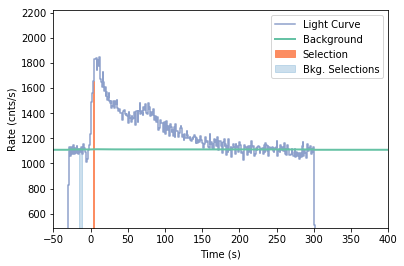

In [10]:
# fit the background

nai1st.set_background_interval(backgroundIntervals[0],backgroundIntervals[1])
nai1st.set_active_time_interval(sourceInterval)
_=nai1st.view_lightcurve(start=-50,stop=400.)

Auto-determined polynomial order: 0




Unbinned 0-order polynomial fit with the Nelder-Mead method




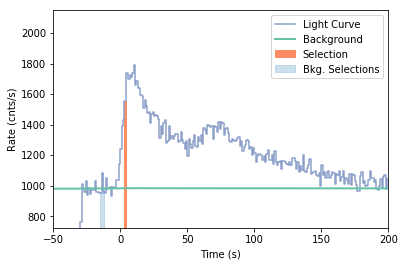

In [11]:
# fit the background

nai2nd.set_background_interval(backgroundIntervals[0],backgroundIntervals[1])
nai2nd.set_active_time_interval(sourceInterval)
_=nai2nd.view_lightcurve(start=-50.,stop=200.)

Auto-determined polynomial order: 0




Unbinned 0-order polynomial fit with the Nelder-Mead method




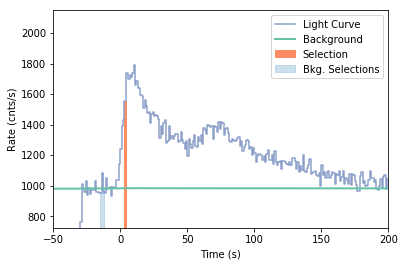

In [12]:
# fit the background

nai3rd.set_background_interval(backgroundIntervals[0],backgroundIntervals[1])
nai3rd.set_active_time_interval(sourceInterval)
_=nai3rd.view_lightcurve(start=-50.,stop=200.)

Auto-determined polynomial order: 0




Unbinned 0-order polynomial fit with the Nelder-Mead method




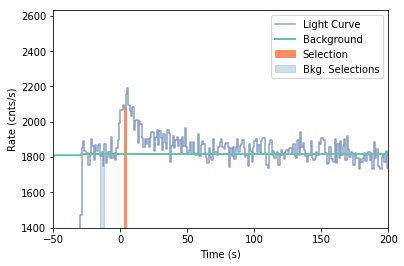

In [13]:
# fit the background

bgo1st.set_background_interval(backgroundIntervals[0],backgroundIntervals[1])
bgo1st.set_active_time_interval(sourceInterval)
_=bgo1st.view_lightcurve(start=-50.,stop=200.)

In [14]:
# finally making the plugins for spectral analysis!

# first NaI

nai1stPlugins = nai1st.to_spectrumlike()

# second NaI

nai2ndPlugins = nai2nd.to_spectrumlike()

# second NaI

nai3rdPlugins = nai3rd.to_spectrumlike()

# BGO

bgo1stPlugins = bgo1st.to_spectrumlike()

Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-probed noise models:
- observation: poisson
- background: gaussian


In [15]:
# Okay, now we have to iterate through all time bins and create a bunch of data lists

# remember to adjust the number of detectors in use (and their names)

data_lists = []

nai1stPlugins.set_active_measurements("8.-30.", "40.-850.")
nai2ndPlugins.set_active_measurements("8.-30.", "40.-850.")
nai3rdPlugins.set_active_measurements("8.-30.", "40.-850.")
bgo1stPlugins.set_active_measurements("250.-40000.")
data_lists.append(DataList(nai1stPlugins, nai2ndPlugins, nai3rdPlugins, bgo1stPlugins))

Range 8.-30. translates to channels 4-21
Range 40.-850. translates to channels 27-121
Now using 113 channels out of 128
Range 8.-30. translates to channels 3-20
Range 40.-850. translates to channels 26-121
Now using 114 channels out of 128
Range 8.-30. translates to channels 3-20
Range 40.-850. translates to channels 26-121
Now using 114 channels out of 128
Range 250.-40000. translates to channels 1-124
Now using 124 channels out of 128


In [16]:
# observed counts

net_data_1=nai1stPlugins.observed_counts
net_data_2=nai2ndPlugins.observed_counts
net_data_3=nai3rdPlugins.observed_counts
net_data_4=bgo1stPlugins.observed_counts

print "qtl=0.5", ":", np.quantile(net_data_1, 0.5), np.quantile(net_data_2, 0.5), np.quantile(net_data_3, 0.5), np.quantile(net_data_4, 0.5)

print "qtl=0.68", ":", np.quantile(net_data_1, 0.68), np.quantile(net_data_2, 0.68), np.quantile(net_data_3, 0.68), np.quantile(net_data_4, 0.68)

print "qtl=0.95", ":", np.quantile(net_data_1, 0.95), np.quantile(net_data_2, 0.95), np.quantile(net_data_3, 0.95), np.quantile(net_data_4, 0.95)


qtl=0.5 : 20.0 21.5 21.5 8.0
qtl=0.68 : 34.72 38.36 38.36 43.36
qtl=0.95 : 78.0 70.94999999999997 70.94999999999997 115.04999999999986


In [17]:
# define the models:

# analytical coasting model

class Custom2(Function1D):
    r"""
    description :
        a custom model
    latex : $ K~\frac{45}{8\pi^4}\, x \,\left( \frac{x/kT}{2} - \ln \left[ \exp{\frac{x/kT}{2}} - 1 \right] \right) $
    parameters :
        Kcoast :
            desc : Normalization (differential flux)
            initial value : 1.0
            min : 0.

        xcoast :
            desc : peak energy
            initial value : 100.
            min : 0.

        cind :
            desc : index
            initial value : 1.0
            min : -2.0

        cstr :
            desc : stretch
            initial value : 0.64
            min : 0.1  

        piv :
            desc : pivot energy
            initial value : 100.0
            fix : yes     

    tests :
        - { x : 10, function value: 0.01, tolerance: 1e-20}
        - { x : 100, function value: 0.0001, tolerance: 1e-20}
    """

    __metaclass__ = FunctionMeta

    def _set_units(self, x_unit, y_unit):

        # The normalization has the same units as the y

        self.xcoast.unit = x_unit

        self.Kcoast.unit =  y_unit

        self.piv.unit = x_unit

    # noinspection PyPep8Naming
    def evaluate(self, x, Kcoast, xcoast, cind, cstr, piv):   

#        index=0.4
#        stretch=0.64
        index=cind
        stretch=cstr
    #    piv=100.
    #
        expo = -1 * np.power( (x / xcoast),stretch)

        coast =  Kcoast * np.power((x/piv), index) * np.exp(expo) 

        return coast

    
# synchrotron table model 

from astromodels import *
from astropy.table import Table
import numpy as np

def read_synch(table_file, p_list, save_name, model_name, data_cut=None):
    """
    Read in a text file of the energy (first column) and photon flux from the lundman model.
    It assumes the parameter is eta. The eta values are input independently (should not be in file)
    and must be in the same order as the columns. This will generate the table which can thne be passed
    around.


    :param table_file: the name of the file containing the data
    :param eta_list: the list of eta values with theordering of the columns in the data file
    :param save_name: name of the file to save
    :param model_name: name of the model
    :param data_cut: a value of the f_nu flux to cut the table at
    """
    table = Table.read(table_file,format='ascii')

    # assuming the first column is energy range

    energy_range = table['col1']


    # we need to sort the etas
    sort_idx = np.argsort(p_list)

    p = p_list[sort_idx]


    # set up a data cut for a flux value
    
    cut = np.ones_like(energy_range, dtype=bool)

    if data_cut is not None:

        # we will not cut all enetires below a certain threshold 
        
        assert type(data_cut) == float, "data_cut must be a float!"
        
        for idx in sort_idx:

            column = idx+2

            n_nu = np.array(table[ 'col%d'%column ])
            
            tmp_cut = n_nu >= data_cut
            
            cut = np.logical_and(cut,tmp_cut) 


    # Start building the template

    temp_factory = TemplateModelFactory(save_name,
                                        model_name,
                                        energy_range[cut],
                                        ['p'])

    temp_factory.define_parameter_grid('p',p)


    # we now will input the flux values either cut or uncut 
    
    for entry, idx in zip(p,sort_idx):

        # need to skip over the energy column
        column = idx+2

        n_nu = np.array(table[ 'col%d'%column ])

        # convert to photon space (the data are acturally in vFv)
        #f_ph = f_nu[cut]/energy_range[cut]/energy_range[cut]

        # add the data for this parameter value

        temp_factory.add_interpolation_data(n_nu,p=entry)

    # Store it
    temp_factory.save_data(overwrite=True)

### MLE

Best fit values:



,result,unit
parameter,,
bn090530760.spectrum.main.Cutoff_powerlaw.K,(1.6 -0.4 +0.5) x 10^-1,1 / (cm2 keV s)
bn090530760.spectrum.main.Cutoff_powerlaw.index,(-1.3 +/- 0.8) x 10^-1,
bn090530760.spectrum.main.Cutoff_powerlaw.xc,(9.4 -0.7 +0.8) x 10,keV



Correlation matrix:



1.00,-0.98,0.75
-0.98,1.00,-0.86
0.75,-0.86,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
bgo0_tte,529.894756
nai1_tte,505.562398
nai2_tte,494.851846
nai5_tte,494.851846
total,2025.160845



Values of statistical measures:



,statistical measures
AIC,4056.373751
BIC,4068.747802


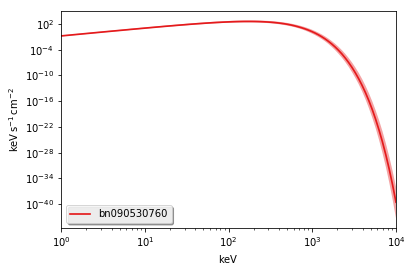

In [18]:
# CPL MLE (mlecpl)

cpl = Cutoff_powerlaw()
GRB_cpl = PointSource(triggerName, ra, dec, spectral_shape=cpl)
model_cpl = Model(GRB_cpl)

cpl.K = 1
cpl.index = alpha_init
cpl.xc = 20

jl_cpl = JointLikelihood(model_cpl, data_lists[0])
res_cpl = jl_cpl.fit()

cpl_mle_ene = jl_cpl.results.get_equal_tailed_interval("bn090530760.spectrum.main.Cutoff_powerlaw.xc")
cpl_mle_ene_minerra = cpl_mle_ene[0]
cpl_mle_ene_maxerra = cpl_mle_ene[1]
cpl_mle_ene_parama = (cpl_mle_ene_maxerra + cpl_mle_ene_minerra)/2 

cpl_mle_norm = jl_cpl.results.get_equal_tailed_interval("bn090530760.spectrum.main.Cutoff_powerlaw.K")
cpl_mle_norm_minerra = cpl_mle_norm[0]
cpl_mle_norm_maxerra = cpl_mle_norm[1]
cpl_mle_norm_parama = (cpl_mle_norm_maxerra + cpl_mle_norm_minerra)/2 

cpl_mle_ind = jl_cpl.results.get_equal_tailed_interval("bn090530760.spectrum.main.Cutoff_powerlaw.index")
cpl_mle_ind_minerra = cpl_mle_ind[0]
cpl_mle_ind_maxerra = cpl_mle_ind[1]
cpl_mle_ind_parama = (cpl_mle_ind_maxerra + cpl_mle_ind_minerra)/2 

mle_cpl = jl_cpl.results
mle_cpl.write_to("mle_cpl.fits", overwrite=True)

mle_cpl_aic= mle_cpl.statistical_measures.AIC
mle_cpl_bic= mle_cpl.statistical_measures.BIC
mle_cpl_stats = (mle_cpl_aic, mle_cpl_bic) 

# get mle params for cpl


columns=['trigName','cpl_mle_ind_param','cpl_mle_ind_maxerr','cpl_mle_ind_minerr','cpl_mle_ene_param','cpl_mle_ene_maxerr','cpl_mle_ene_minerr','cpl_mle_norm_param','cpl_mle_norm_maxerr','cpl_mle_norm_minerr', 'mle_cpl_aic', 'mle_cpl_bic']
smt = np.hstack((triggerName, cpl_mle_ind_parama, cpl_mle_ind_maxerra, cpl_mle_ind_minerra, cpl_mle_ene_parama, cpl_mle_ene_maxerra, cpl_mle_ene_minerra, cpl_mle_norm_parama, cpl_mle_norm_maxerra, cpl_mle_norm_minerra, mle_cpl_aic, mle_cpl_bic))
df_mlecpl = pd.DataFrame(smt.reshape(-1, len(smt)),columns=columns)

pickling_on = open("mlecpl.pickle","wb")
pickle.dump(df_mlecpl, pickling_on)
pickling_on.close()

_ = plot_point_source_spectra(mle_cpl, ene_min=1, ene_max=1E4, flux_unit='keV2/(cm2 s keV)')


In [19]:
# COAST MLE (mlecoast)

from generate_table import read_table

eta = np.array([1.E2, 3.16E1, 1E1, 3.16, 1 , 3.16E-1])
read_table(table_file="table.txt",
            eta_list=eta,
            save_name="coast",
            model_name="Photosphere1",
            data_cut=None)

coast = TemplateModel('coast')

GRB_coast = PointSource( triggerName, ra, dec, spectral_shape=coast )
model_coast = Model( GRB_coast ) 

coast.K= 1
coast.scale= epk_init
coast.eta = 0.316
coast.eta.free = False

jl_coast = JointLikelihood(model_coast, data_lists[0])
res_coast = jl_coast.fit()

coast_mle_ene = jl_coast.results.get_equal_tailed_interval("bn090530760.spectrum.main.coast.scale")
coast_mle_ene_minerr = coast_mle_ene[0]
coast_mle_ene_maxerr = coast_mle_ene[1]
coast_mle_ene_param = (coast_mle_ene_maxerr + coast_mle_ene_minerr)/2 
    
coast_mle_norm = jl_coast.results.get_equal_tailed_interval("bn090530760.spectrum.main.coast.K")
coast_mle_norm_minerr = coast_mle_norm[0]
coast_mle_norm_maxerr = coast_mle_norm[1]
coast_mle_norm_param= (coast_mle_norm_maxerr + coast_mle_norm_minerr)/2 

mle_coast = jl_coast.results
mle_coast.write_to("mle_coast.fits", overwrite=True)

mle_coast_aic= mle_coast.statistical_measures.AIC
mle_coast_bic= mle_coast.statistical_measures.BIC
mle_coast_stats = (mle_coast_aic, mle_coast_bic) 

# get MLE params for coast

columns=['coast_mle_ene_param','coast_mle_ene_maxerr','coast_mle_ene_minerr','coast_mle_norm_param','coast_mle_norm_maxerr','coast_mle_norm_minerr', 'mle_coast_aic', 'mle_coast_bic']
smt = np.hstack((coast_mle_ene_param, coast_mle_ene_maxerr, coast_mle_ene_minerr , coast_mle_norm_param , coast_mle_norm_maxerr, coast_mle_norm_minerr, mle_coast_aic, mle_coast_bic))

df_mlecoast = pd.DataFrame(smt.reshape(-1, len(smt)),columns=columns)

pickling_on = open("mlecoast.pickle","wb")
pickle.dump(df_mlecoast, pickling_on)
pickling_on.close()

#_ = plot_point_source_spectra(mle_coast, ene_min=1, ene_max=1E4, flux_unit='keV2/(cm2 s keV)')


Best fit values:



,result,unit
parameter,,
bn090530760.spectrum.main.coast.K,3.36 +/- 0.10,1 / (cm2 keV s)
bn090530760.spectrum.main.coast.scale,(7.04 +/- 0.27) x 10,1 / keV



Correlation matrix:



1.00,-0.56
-0.56,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
bgo0_tte,529.790930
nai1_tte,504.569443
nai2_tte,494.904919
nai5_tte,494.904919
total,2024.170210



Values of statistical measures:



,statistical measures
AIC,4052.366395
BIC,4060.624496


In [20]:
# SYNCH MLE (mlesynch)

from generate_table import read_table

pindex= np.array([2.5, 3, 3.5, 4])

read_synch(table_file="synch_tabell.txt",
            p_list=pindex,
            save_name="synch",
            model_name="synch",
            data_cut=None)

synch = TemplateModel('synch')

GRB_synch = PointSource( triggerName, ra, dec, spectral_shape=synch )
model_synch = Model( GRB_synch )

synch.K = 1
synch.scale = epk_init
synch.p = 3.8
synch.p.free = False

jl_synch = JointLikelihood(model_synch, data_lists[0])

res_synch = jl_synch.fit()
        

synch_mle_ene = jl_synch.results.get_equal_tailed_interval("bn090530760.spectrum.main.synch.scale")
synch_mle_ene_minerr = synch_mle_ene[0]
synch_mle_ene_maxerr = synch_mle_ene[1]
synch_mle_ene_param = (synch_mle_ene_maxerr + synch_mle_ene_minerr)/2 
    
synch_mle_norm = jl_synch.results.get_equal_tailed_interval("bn090530760.spectrum.main.synch.K")
synch_mle_norm_minerr = synch_mle_norm[0]
synch_mle_norm_maxerr = synch_mle_norm[1]
synch_mle_norm_param = (synch_mle_norm_maxerr + synch_mle_norm_minerr)/2 
    
mle_synch=jl_synch.results
mle_synch.write_to("mle_synch.fits", overwrite=True)

mle_synch_aic= mle_synch.statistical_measures.AIC
mle_synch_bic= mle_synch.statistical_measures.BIC
mle_synch_stats = (mle_synch_aic, mle_synch_bic)

# get MLE params for synch

columns=['synch_mle_ene_param','synch_mle_ene_maxerr','synch_mle_ene_minerr','synch_mle_norm_param','synch_mle_norm_maxerr','synch_mle_norm_minerr', 'mle_synch_aic', 'mle_synch_bic']
smt = np.hstack((synch_mle_ene_param, synch_mle_ene_maxerr, synch_mle_ene_minerr , synch_mle_norm_param , synch_mle_norm_maxerr, synch_mle_norm_minerr, mle_synch_aic, mle_synch_bic))

df_mlesynch = pd.DataFrame(smt.reshape(-1, len(smt)),columns=columns)

pickling_on = open("mlesynch.pickle","wb")
pickle.dump(df_mlesynch, pickling_on)
pickling_on.close()

# synchrotron plotting commented out due to convenience (takes a long time)

#_ = plot_point_source_spectra(mle_synch, ene_min=1, ene_max=1E4, flux_unit='keV2/(cm2 s keV)')


Best fit values:



,result,unit
parameter,,
bn090530760.spectrum.main.synch.K,1.97 +/- 0.07,1 / (cm2 keV s)
bn090530760.spectrum.main.synch.scale,(1.53 +/- 0.10) x 10^2,1 / keV



Correlation matrix:



1.00,-0.75
-0.75,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
bgo0_tte,533.502921
nai1_tte,511.033103
nai2_tte,505.978693
nai5_tte,505.978693
total,2056.493409



Values of statistical measures:



,statistical measures
AIC,4117.012793
BIC,4125.270893


In [22]:
# MULTINEST

In [21]:
rm -rf chains_cpl*

In [22]:
df_mlecpl

,trigName,cpl_mle_ind_param,cpl_mle_ind_maxerr,cpl_mle_ind_minerr,cpl_mle_ene_param,cpl_mle_ene_maxerr,cpl_mle_ene_minerr,cpl_mle_norm_param,cpl_mle_norm_maxerr,cpl_mle_norm_minerr,mle_cpl_aic,mle_cpl_bic
0,bn090530760,-0.13454660755422884,-0.0558707047712852,-0.21322251033717246,94.5017008045903,101.71904823544565,87.28435337373494,0.1666922934498952,0.21199056517138798,0.12139402172840241,4056.373750672678,4068.747802151913



Sampling

MULTINEST has its own convergence criteria... you will have to wait blindly for it to finish
If INS is enabled, one can monitor the likelihood in the terminal for completion information
  analysing data from chains_cpl/fit-.txt
Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn090530760.spectrum.main.Cutoff_powerlaw.K,(1.8 +/- 0.7) x 10^-1,1 / (cm2 keV s)
bn090530760.spectrum.main.Cutoff_powerlaw.index,(-1.4 +/- 1.2) x 10^-1,
bn090530760.spectrum.main.Cutoff_powerlaw.xc,(9.6 +/- 1.1) x 10,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
bgo0_tte,-529.075887
nai1_tte,-504.851129
nai2_tte,-493.958610
nai5_tte,-493.958610
total,-2021.844236



Values of statistical measures:



,statistical measures
AIC,4049.740532
BIC,4062.114584
DIC,4034.092093
PDIC,-17.724126
log(Z),-885.091563


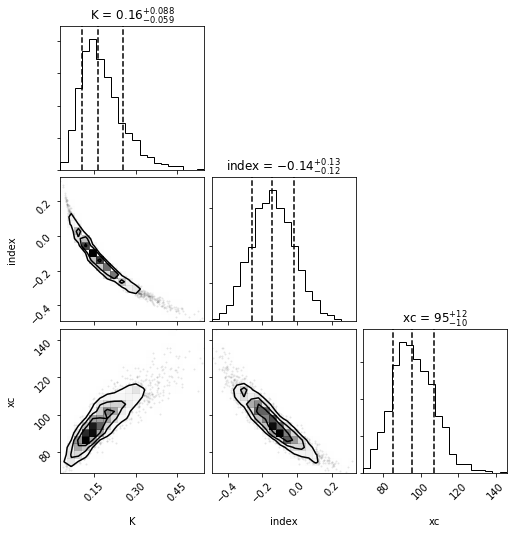

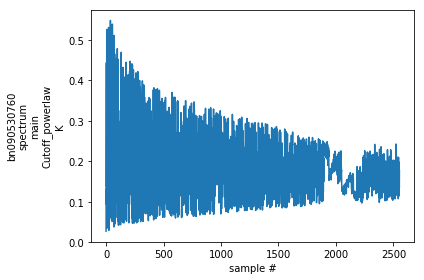

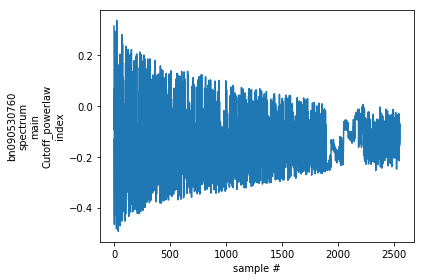

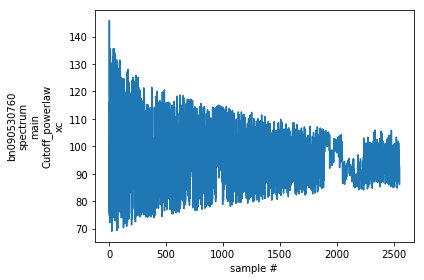

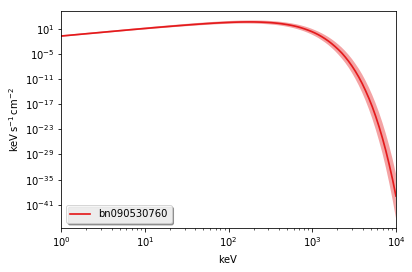

In [23]:
## CPL MULTI (multicpl)
  
cpl=Cutoff_powerlaw()
GRB=PointSource(triggerName, ra, dec, spectral_shape=cpl)
model_cpl=Model(GRB)

    
cpl.K = cpl_mle_norm_parama
cpl.index = cpl_mle_ind_parama
cpl.xc = cpl_mle_ene_parama

cpl.K.prior = Log_uniform_prior(lower_bound=1e-6, upper_bound=5e2)
cpl.index.prior = Uniform_prior(lower_bound=-2, upper_bound=1.5)
cpl.xc.prior = Uniform_prior(lower_bound=10., upper_bound=1500.)
    
multi_cpl= BayesianAnalysis(model_cpl, data_lists[0])
samples_cpl = multi_cpl.sample_multinest(600, chain_name="chains_cpl/fit-") 

multi_cpl.results.write_to("multi_cpl.fits", overwrite=True)

multi_cpl.results.corner_plot()

multi_cpl.results.plot_chains()

_ = plot_point_source_spectra(multi_cpl.results,ene_min=1,ene_max=1E4,flux_unit='keV2/(cm2 s keV)')

In [24]:
# CPL PPC (multicplppc)

parray = np.arange(1, 501, 1)
    

for p in parray:
    
        
        #p times replicated datasets for 3 detectors
        
    if p == 1:
        #get a simulation
        synthetic1 = nai1stPlugins.get_simulated_dataset()
        synthetic2 = nai2ndPlugins.get_simulated_dataset()
        synthetic3 = nai3rdPlugins.get_simulated_dataset()
        synthetic4 = bgo1stPlugins.get_simulated_dataset()
    
        net_sim_1 = synthetic1.observed_counts
        net_sim_2 = synthetic2.observed_counts
        net_sim_3 = synthetic3.observed_counts
        net_sim_4 = synthetic4.observed_counts

        
      #  net_sim_1_err = synthetic_1.observed_count_errors
      #  net_sim_2_err = synthetic_2.observed_count_errors
       # net_sim_3_err = synthetic_3.observed_count_errors
            
        rep_1 = []
        rep_2 = []
        rep_3 = []
        rep_4 = []

            
        rep_1.append(net_sim_1)
        rep_2.append(net_sim_2)
        rep_3.append(net_sim_3)
        rep_4.append(net_sim_4)

            
        ppc_1 = []
        ppc_2 = []
        ppc_3 = []
        ppc_4 = []

            
        p1 = np.column_stack((pd.DataFrame(net_data_1), pd.DataFrame(np.array(rep_1).T)))
        p2 = np.column_stack((pd.DataFrame(net_data_2), pd.DataFrame(np.array(rep_2).T)))
        p3 = np.column_stack((pd.DataFrame(net_data_3), pd.DataFrame(np.array(rep_3).T)))
        p4 = np.column_stack((pd.DataFrame(net_data_4), pd.DataFrame(np.array(rep_4).T)))

            
            
        ppc_1 = pd.DataFrame(p1)
        ppc_2 = pd.DataFrame(p2)
        ppc_3 = pd.DataFrame(p3)
        ppc_4 = pd.DataFrame(p4)


   
            
    else:
        #get another simulation
        synthetic1 = nai1stPlugins.get_simulated_dataset()
        synthetic2 = nai2ndPlugins.get_simulated_dataset()
        synthetic3 = nai3rdPlugins.get_simulated_dataset()
        synthetic4 = bgo1stPlugins.get_simulated_dataset()

    
        net_sim_1 = synthetic1.observed_counts
        net_sim_2 = synthetic2.observed_counts
        net_sim_3 = synthetic3.observed_counts
        net_sim_4 = synthetic4.observed_counts
        
        #net_sim_1_err = synthetic_1.observed_count_errors
        #net_sim_2_err = synthetic_2.observed_count_errors
        #net_sim_3_err = synthetic_3.observed_count_errors

        ppc_1 = pd.DataFrame(np.column_stack((ppc_1, net_sim_1)))
        ppc_2 = pd.DataFrame(np.column_stack((ppc_2, net_sim_2)))
        ppc_3 = pd.DataFrame(np.column_stack((ppc_3, net_sim_3)))
        ppc_4 = pd.DataFrame(np.column_stack((ppc_4, net_sim_4)))

        


ppc_1.to_csv('ppc_nai1st_cpl.csv')
ppc_2.to_csv('ppc_nai2nd_cpl.csv')
ppc_3.to_csv('ppc_nai3rd_cpl.csv')
ppc_4.to_csv('ppc_bgo1st_cpl.csv')


# get the BB QQ plots for counts - rep. 50

import statsmodels.formula.api as smf

d1 = pd.read_csv('ppc_nai1st_cpl.csv' )
d2 = pd.read_csv('ppc_nai2nd_cpl.csv' )
d3 = pd.read_csv('ppc_nai3rd_cpl.csv' )
d4 = pd.read_csv('ppc_bgo1st_cpl.csv' ) 


Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

      x     y
0   4.0  11.0
1  21.0  20.0
2  40.0  43.0
3  48.0  57.0
4  70.0  73.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9862
Model:                       QuantReg   Bandwidth:                       8.953
Method:                 Least Squares   Sparsity:                        25.88
Date:                Thu, 29 Aug 2019   No. Observations:                  128
Time:                        12:12:25   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7987      2.854      4.835      0.000       8.151      19.446
x              1.0434      0.001    966.981      0.000       1.041       1.046

The condition number is large, 6.6e+03. This m

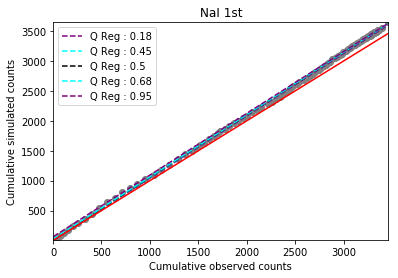

      x     y
0   0.0   1.0
1  13.0  13.0
2  31.0  28.0
3  47.0  41.0
4  63.0  59.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9846
Model:                       QuantReg   Bandwidth:                       16.28
Method:                 Least Squares   Sparsity:                        41.39
Date:                Thu, 29 Aug 2019   No. Observations:                  128
Time:                        12:12:26   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0614      4.467     -0.909      0.365     -12.901       4.778
x              1.0342      0.002    592.568      0.000       1.031       1.038

The condition number is large, 6.25e+03. This 

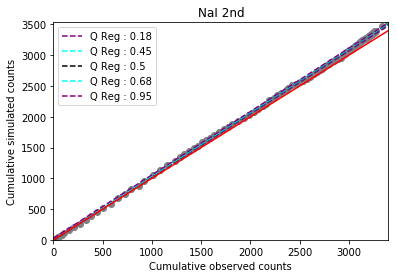

      x     y
0   0.0   9.0
1  13.0  22.0
2  31.0  31.0
3  47.0  45.0
4  63.0  69.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9840
Model:                       QuantReg   Bandwidth:                       14.47
Method:                 Least Squares   Sparsity:                        38.94
Date:                Thu, 29 Aug 2019   No. Observations:                  128
Time:                        12:12:27   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3642      4.202      1.515      0.132      -1.951      14.679
x              0.9942      0.002    605.545      0.000       0.991       0.997

The condition number is large, 6.25e+03. This 

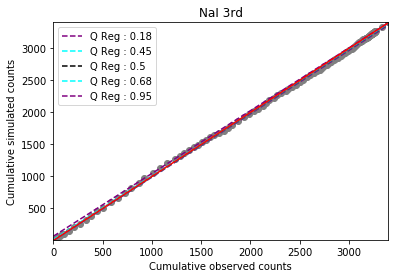

        x       y
0   625.0   800.0
1   818.0  1004.0
2  1005.0  1190.0
3  1149.0  1356.0
4  1286.0  1478.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9782
Model:                       QuantReg   Bandwidth:                       19.27
Method:                 Least Squares   Sparsity:                        48.20
Date:                Thu, 29 Aug 2019   No. Observations:                  128
Time:                        12:12:27   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    189.2129      8.593     22.020      0.000     172.208     206.218
x              1.0267      0.002    438.527      0.000       1.022       1.031

The condition number i

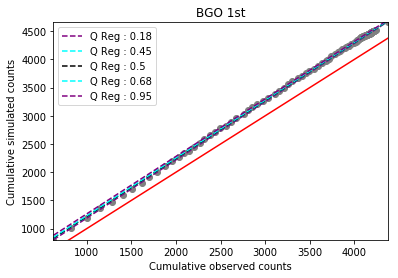

In [25]:
## NAI 1st
data = d1
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 1st")
plt.legend()
plt.show()

## NAI 2nd
data = d2
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 2nd")
plt.legend()
plt.show()



## NAI 3rd

data = d3
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 3rd")
plt.legend()
plt.show()


## BGO 1st

data = d4
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x), 1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("BGO 1st")
plt.legend()
plt.show()

In [26]:
# get Cpl Multinest params (multicplparams)

results_reloaded = load_analysis_results("multi_cpl.fits")

cpl_index = results_reloaded.get_variates("bn090530760.spectrum.main.Cutoff_powerlaw.index")
cpl_index_eti = cpl_index.equal_tail_interval(cl=0.68)
cpl_index_hpd = cpl_index.highest_posterior_density_interval(cl=0.68)
cpl_index_median = cpl_index.median 
cpl_index= (cpl_index_median, cpl_index_hpd[0], cpl_index_hpd[1])
cpl_index = np.transpose(cpl_index)


cpl_epk = results_reloaded.get_variates("bn090530760.spectrum.main.Cutoff_powerlaw.xc")
cpl_epk_eti = np.array(cpl_epk.equal_tail_interval(cl=0.68))
cpl_epk_hpd = np.array(cpl_epk.highest_posterior_density_interval(cl=0.68))
cpl_epk_median = cpl_epk.median 
cpl_epk= (cpl_epk_median, cpl_epk_hpd[0], cpl_epk_hpd[1])
cpl_epk = np.transpose(cpl_epk)

cpl_norm = results_reloaded.get_variates("bn090530760.spectrum.main.Cutoff_powerlaw.K")
cpl_norm_eti = np.array(cpl_norm.equal_tail_interval(cl=0.68))
cpl_norm_hpd = np.array(cpl_norm.highest_posterior_density_interval(cl=0.68))
cpl_norm_median = cpl_norm.median 
cpl_norm= (cpl_norm_median, cpl_norm_hpd[0], cpl_norm_hpd[1])
cpl_norm = np.transpose(cpl_norm)

cpl_aic = results_reloaded.statistical_measures.AIC
cpl_bic = results_reloaded.statistical_measures.BIC
cpl_dic = results_reloaded.statistical_measures.DIC

cpl_stats = (cpl_aic, cpl_bic, cpl_dic)

# evidence for cpl

datContent = [i.strip().split() for i in open("chains_cpl/fit-stats.dat").readlines()]

ev_cpl= datContent[0][5]
ev_cpl_err = datContent[0][7]

print ev_cpl,"+/-", ev_cpl_err

columns=['trigName', 'cpl_epk_median','cpl_epk_hpd_1','cpl_epk_hpd_2', 'cpl_ind_median', 'cpl_ind_hpd_1', 'cpl_ind_hpd_2', 'cpl_norm_median','cpl_norm_hpd_1','cpl_norm_hpd_2','cpl_aic', 'cpl_bic', 'cpl_dic', 'cpl_ev', 'cpl_ev_err']
smt = np.hstack((triggerName,  cpl_epk, cpl_index, cpl_norm, cpl_aic, cpl_bic, cpl_dic, ev_cpl, ev_cpl_err))

df_multicpl = pd.DataFrame(smt.reshape(-1, len(smt)),columns=columns)

pickling_on = open("multicpl.pickle","wb")
pickle.dump(df_multicpl, pickling_on)
pickling_on.close()

-0.203818884826848466E+04 +/- 0.138508328686427873E+00


In [29]:
rm -rf chains_coast*


Sampling

MULTINEST has its own convergence criteria... you will have to wait blindly for it to finish
If INS is enabled, one can monitor the likelihood in the terminal for completion information
  analysing data from chains_coast/fit-.txt
Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn090530760.spectrum.main.coast.K,3.36 +/- 0.10,1 / (cm2 keV s)
bn090530760.spectrum.main.coast.scale,(7.05 -0.27 +0.28) x 10,1 / keV



Values of -log(posterior) at the minimum:



,-log(posterior)
bgo0_tte,-529.793146
nai1_tte,-504.541085
nai2_tte,-494.918333
nai5_tte,-494.918333
total,-2024.170898



Values of statistical measures:



,statistical measures
AIC,4052.367770
BIC,4060.625871
DIC,4052.182174
PDIC,1.920363
log(Z),-883.719574


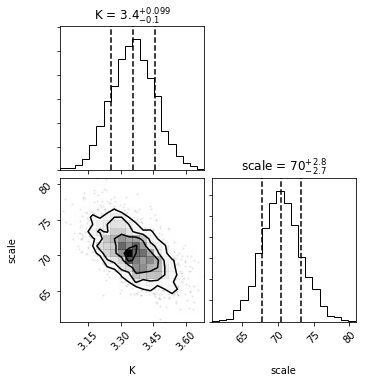

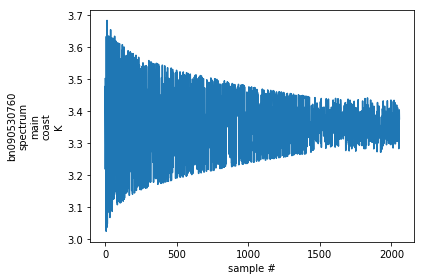

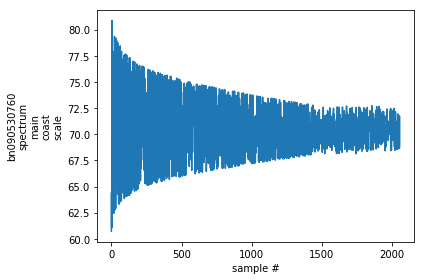

In [30]:
# COAST MULTI (multicoast)

from generate_table import read_table

eta = np.array([1.E2, 3.16E1, 1E1, 3.16, 1 , 3.16E-1])
read_table(table_file="table.txt",
            eta_list=eta,
            save_name="coast",
            model_name="Photosphere1",
            data_cut=None)

coast = TemplateModel('coast')

GRB_coast = PointSource( triggerName, ra, dec, spectral_shape=coast )
model_coast = Model( GRB_coast ) 

coast.K.prior = Uniform_prior(lower_bound=1., upper_bound=200.)
coast.scale.prior = Uniform_prior(lower_bound=1e-1, upper_bound=5e2)

coast.K= coast_mle_norm_param
coast.scale= coast_mle_ene_param
coast.eta = 0.316
coast.eta.free = False

multi_coast = BayesianAnalysis(model_coast, data_lists[0])
samples_coast = multi_coast.sample_multinest(600, chain_name="chains_coast/fit-") 

multi_coast.results.write_to("multi_coast.fits", overwrite=True)

multi_coast.results.corner_plot()

multi_coast.results.plot_chains()

#_ = plot_point_source_spectra(multi_coast.results,ene_min=1,ene_max=1E4,flux_unit='keV2/(cm2 s keV)')

In [31]:
# Multi coast PPC (multicoastppc)

parray = np.arange(1, 501, 1)
    

for p in parray:
    
        
        #p times replicated datasets for 3 detectors
        
    if p == 1:
        #get a simulation
        synthetic1 = nai1stPlugins.get_simulated_dataset()
        synthetic2 = nai2ndPlugins.get_simulated_dataset()
        synthetic3 = nai3rdPlugins.get_simulated_dataset()
        synthetic4 = bgo1stPlugins.get_simulated_dataset()
    
        net_sim_1 = synthetic1.observed_counts
        net_sim_2 = synthetic2.observed_counts
        net_sim_3 = synthetic3.observed_counts
        net_sim_4 = synthetic4.observed_counts

        
      #  net_sim_1_err = synthetic_1.observed_count_errors
      #  net_sim_2_err = synthetic_2.observed_count_errors
       # net_sim_3_err = synthetic_3.observed_count_errors
            
        rep_1 = []
        rep_2 = []
        rep_3 = []
        rep_4 = []

            
        rep_1.append(net_sim_1)
        rep_2.append(net_sim_2)
        rep_3.append(net_sim_3)
        rep_4.append(net_sim_4)

            
        ppc_1 = []
        ppc_2 = []
        ppc_3 = []
        ppc_4 = []

            
        p1 = np.column_stack((pd.DataFrame(net_data_1), pd.DataFrame(np.array(rep_1).T)))
        p2 = np.column_stack((pd.DataFrame(net_data_2), pd.DataFrame(np.array(rep_2).T)))
        p3 = np.column_stack((pd.DataFrame(net_data_3), pd.DataFrame(np.array(rep_3).T)))
        p4 = np.column_stack((pd.DataFrame(net_data_4), pd.DataFrame(np.array(rep_4).T)))

            
            
        ppc_1 = pd.DataFrame(p1)
        ppc_2 = pd.DataFrame(p2)
        ppc_3 = pd.DataFrame(p3)
        ppc_4 = pd.DataFrame(p4)


   
            
    else:
        #get another simulation
        synthetic1 = nai1stPlugins.get_simulated_dataset()
        synthetic2 = nai2ndPlugins.get_simulated_dataset()
        synthetic3 = nai3rdPlugins.get_simulated_dataset()
        synthetic4 = bgo1stPlugins.get_simulated_dataset()

    
        net_sim_1 = synthetic1.observed_counts
        net_sim_2 = synthetic2.observed_counts
        net_sim_3 = synthetic3.observed_counts
        net_sim_4 = synthetic4.observed_counts
        
        #net_sim_1_err = synthetic_1.observed_count_errors
        #net_sim_2_err = synthetic_2.observed_count_errors
        #net_sim_3_err = synthetic_3.observed_count_errors

        ppc_1 = pd.DataFrame(np.column_stack((ppc_1, net_sim_1)))
        ppc_2 = pd.DataFrame(np.column_stack((ppc_2, net_sim_2)))
        ppc_3 = pd.DataFrame(np.column_stack((ppc_3, net_sim_3)))
        ppc_4 = pd.DataFrame(np.column_stack((ppc_4, net_sim_4)))

        


ppc_1.to_csv('ppc_nai1st_ndpc.csv')
ppc_2.to_csv('ppc_nai2nd_ndpc.csv')
ppc_3.to_csv('ppc_nai3rd_ndpc.csv')
ppc_4.to_csv('ppc_bgo1st_ndpc.csv')


# get the BB QQ plots for counts - rep. 50

import statsmodels.formula.api as smf

d1 = pd.read_csv('ppc_nai1st_ndpc.csv' )
d2 = pd.read_csv('ppc_nai2nd_ndpc.csv' )
d3 = pd.read_csv('ppc_nai3rd_ndpc.csv' )
d4 = pd.read_csv('ppc_bgo1st_ndpc.csv' ) 


Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 


WARNING UserWarning: Generated background has negative counts in 6 channels. Fixing them to zero



Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 


WARNING UserWarning: Generated background has negative counts in 6 channels. Fixing them to zero



Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

      x     y
0   4.0   4.0
1  21.0  19.0
2  40.0  37.0
3  48.0  54.0
4  70.0  75.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9899
Model:                       QuantReg   Bandwidth:                       10.36
Method:                 Least Squares   Sparsity:                        28.22
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        10:31:03   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7987      3.113      1.220      0.225      -2.361       9.959
x              1.0464      0.001    889.102      0.000       1.044       1.049

The condition number is large, 6.6e+03. This m

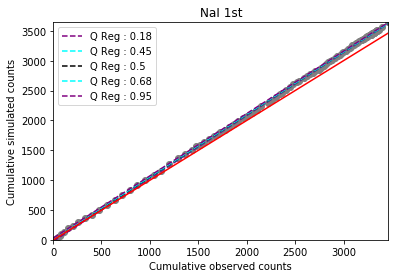

      x     y
0   0.0   7.0
1  13.0  12.0
2  31.0  28.0
3  47.0  43.0
4  63.0  60.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9848
Model:                       QuantReg   Bandwidth:                       11.28
Method:                 Least Squares   Sparsity:                        32.15
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        10:31:04   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3811      3.469      1.551      0.123      -1.484      12.246
x              0.9939      0.001    733.285      0.000       0.991       0.997

The condition number is large, 6.25e+03. This 

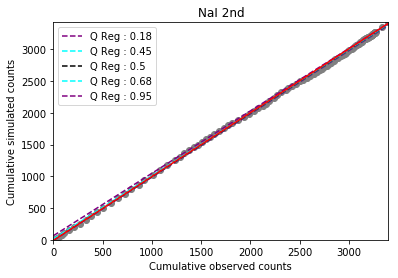

      x     y
0   0.0   9.0
1  13.0  15.0
2  31.0  32.0
3  47.0  52.0
4  63.0  73.0



WARNING IterationLimitWarning: Maximum number of iterations (1000) reached.



                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9810
Model:                       QuantReg   Bandwidth:                       19.31
Method:                 Least Squares   Sparsity:                        48.23
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        10:31:06   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.1712      5.204      9.064      0.000      36.873      57.470
x              0.9742      0.002    479.084      0.000       0.970       0.978

The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.



WARNING IterationLimitWarning: Maximum number of iterations (1000) reached.



0.68
0.95
     qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.18  11.477056  0.976555        0.969635        0.983474
1  0.45  38.755665  0.976426        0.972322        0.980531
2  0.50  47.171157  0.974196        0.970172        0.978221
3  0.68  62.659745  0.970301        0.966723        0.973879
4  0.95  79.416699  0.966519        0.963934        0.969103


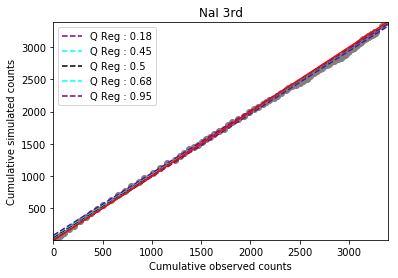

        x       y
0   625.0   748.0
1   818.0   913.0
2  1005.0  1097.0
3  1149.0  1250.0
4  1286.0  1380.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9798
Model:                       QuantReg   Bandwidth:                       12.19
Method:                 Least Squares   Sparsity:                        34.68
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        10:31:08   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    187.5924      6.181     30.348      0.000     175.360     199.825
x              0.9702      0.002    576.044      0.000       0.967       0.974

The condition number i

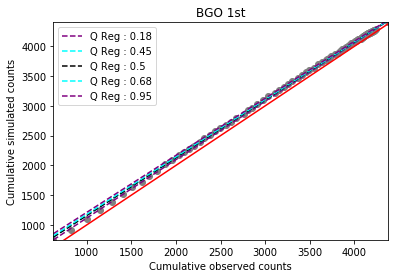

In [32]:
## NAI 1st
data = d1
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 1st")
plt.legend()
plt.show()

## NAI 2nd
data = d2
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 2nd")
plt.legend()
plt.show()



## NAI 3rd

data = d3
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 3rd")
plt.legend()
plt.show()


## BGO 1st

data = d4
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x), 1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("BGO 1st")
plt.legend()
plt.show()


In [27]:
# Multi coast params (multicoastparams)

results_reloaded = load_analysis_results("multi_coast.fits")

coast_ene = results_reloaded.get_variates("bn090530760.spectrum.main.coast.scale")
coast_ene_eti = coast_ene.equal_tail_interval(cl=0.68)
coast_ene_hpd = coast_ene.highest_posterior_density_interval(cl=0.68)
coast_ene_median = coast_ene.median 
coast_ene= (coast_ene_median, coast_ene_hpd[0], coast_ene_hpd[1])
coast_ene = np.transpose(coast_ene)


coast_norm = results_reloaded.get_variates("bn090530760.spectrum.main.coast.K")
coast_norm_eti = np.array(coast_norm.equal_tail_interval(cl=0.68))
coast_norm_hpd = np.array(coast_norm.highest_posterior_density_interval(cl=0.68))
coast_norm_median = coast_norm.median 
coast_norm= (coast_norm_median, coast_norm_hpd[0], coast_norm_hpd[1])
coast_norm = np.transpose(coast_norm)

coast_aic = results_reloaded.statistical_measures.AIC
coast_bic = results_reloaded.statistical_measures.BIC
coast_dic = results_reloaded.statistical_measures.DIC

coast_stats = (coast_aic, coast_bic, coast_dic)

# evidence for coast

datContent = [i.strip().split() for i in open("chains_coast/fit-stats.dat").readlines()]

ev_coast = datContent[0][5]
ev_coast_err = datContent[0][7]

print ev_coast, "+/-", ev_coast_err

#bayes coast all

columns=['coast_scale_median', 'coast_scale_hpd_1','coast_scale_hpd_2','coast_epk_median', 'coast_epk_hpd_1','coast_epk_hpd_2','coast_norm_median','coast_norm__hpd_1','coast_norm__hpd_2', 'coast_aic', 'coast_bic', 'coast_dic', 'coast_ev', 'coast_ev_err']
smt = np.hstack((coast_ene, coast_ene/2.55, coast_norm, coast_aic, coast_bic, coast_dic, ev_coast, ev_coast_err))

df_multicoast = pd.DataFrame(smt.reshape(-1, len(smt)),columns=columns)

pickling_on = open("multicoast.pickle","wb")
pickle.dump(df_multicoast, pickling_on)
pickling_on.close()

-0.203522491540934584E+04 +/- 0.129766227612775620E+00


In [34]:
rm -rf chains_synch*


Sampling

MULTINEST has its own convergence criteria... you will have to wait blindly for it to finish
If INS is enabled, one can monitor the likelihood in the terminal for completion information
  analysing data from chains_synch/fit-.txt
Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn090530760.spectrum.main.synch.K,1.97 +/- 0.08,1 / (cm2 keV s)
bn090530760.spectrum.main.synch.scale,(1.54 +/- 0.10) x 10^2,1 / keV



Values of -log(posterior) at the minimum:



,-log(posterior)
bgo0_tte,-533.794918
nai1_tte,-511.320513
nai2_tte,-506.277118
nai5_tte,-506.277118
total,-2057.669667



Values of statistical measures:



,statistical measures
AIC,4119.365308
BIC,4127.623408
DIC,4117.744112
PDIC,2.070681
log(Z),-897.189431


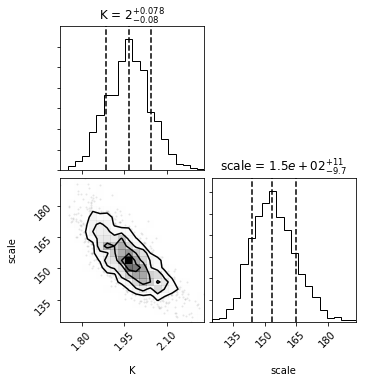

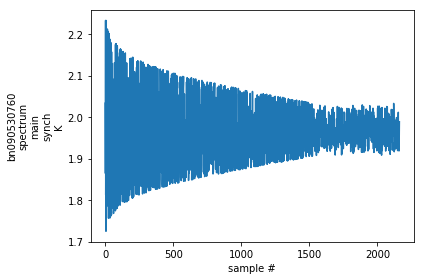

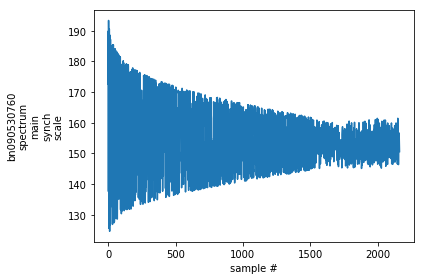

In [35]:
# MULTI SYNCH (multisynch)

# SYNCH MULTI
#1st model fit with multinest: blackbody

from generate_table import read_table

# Synchrotron model: Table model

pindex= np.array([2.5, 3., 3.5, 4])

read_synch(table_file="synch_tabell.txt",
           p_list=pindex,
           save_name="synch",
           model_name="synch",
  
           data_cut=None)

synch = TemplateModel('synch')

GRB_synch = PointSource( triggerName, ra, dec, spectral_shape=synch )
model_synch = Model( GRB_synch )

synch.K = synch_mle_norm_param
synch.scale = synch_mle_ene_param
synch.p = 3.8
synch.p.free = False

synch.K.prior = Log_uniform_prior(lower_bound=1e-2, upper_bound=1e2)
synch.scale.prior = Uniform_prior(lower_bound=1., upper_bound=2000.)
#synch.p.prior = Uniform_prior(lower_bound=3.5, upper_bound=4.)

multi_synch = BayesianAnalysis(model_synch, data_lists[0])
samples_synch = multi_synch.sample_multinest(600, chain_name="chains_synch/fit-") 

multi_synch.results.write_to("multi_synch.fits", overwrite=True)

multi_synch.results.corner_plot()

multi_synch.results.plot_chains()

#_ = plot_point_source_spectra(multi_synch.results,ene_min=1,ene_max=1E4,flux_unit='keV2/(cm2 s keV)')

In [36]:
# multi synch ppc (multisynchppc)

parray = np.arange(1, 501, 1)
    

for p in parray:
    
        
        #p times replicated datasets for 3 detectors
        
    if p == 1:
        #get a simulation
        synthetic1 = nai1stPlugins.get_simulated_dataset()
        synthetic2 = nai2ndPlugins.get_simulated_dataset()
        synthetic3 = nai3rdPlugins.get_simulated_dataset()
        synthetic4 = bgo1stPlugins.get_simulated_dataset()
    
        net_sim_1 = synthetic1.observed_counts
        net_sim_2 = synthetic2.observed_counts
        net_sim_3 = synthetic3.observed_counts
        net_sim_4 = synthetic4.observed_counts

        
      #  net_sim_1_err = synthetic_1.observed_count_errors
      #  net_sim_2_err = synthetic_2.observed_count_errors
       # net_sim_3_err = synthetic_3.observed_count_errors
            
        rep_1 = []
        rep_2 = []
        rep_3 = []
        rep_4 = []

            
        rep_1.append(net_sim_1)
        rep_2.append(net_sim_2)
        rep_3.append(net_sim_3)
        rep_4.append(net_sim_4)

            
        ppc_1 = []
        ppc_2 = []
        ppc_3 = []
        ppc_4 = []

            
        p1 = np.column_stack((pd.DataFrame(net_data_1), pd.DataFrame(np.array(rep_1).T)))
        p2 = np.column_stack((pd.DataFrame(net_data_2), pd.DataFrame(np.array(rep_2).T)))
        p3 = np.column_stack((pd.DataFrame(net_data_3), pd.DataFrame(np.array(rep_3).T)))
        p4 = np.column_stack((pd.DataFrame(net_data_4), pd.DataFrame(np.array(rep_4).T)))

            
            
        ppc_1 = pd.DataFrame(p1)
        ppc_2 = pd.DataFrame(p2)
        ppc_3 = pd.DataFrame(p3)
        ppc_4 = pd.DataFrame(p4)


   
            
    else:
        #get another simulation
        synthetic1 = nai1stPlugins.get_simulated_dataset()
        synthetic2 = nai2ndPlugins.get_simulated_dataset()
        synthetic3 = nai3rdPlugins.get_simulated_dataset()
        synthetic4 = bgo1stPlugins.get_simulated_dataset()

    
        net_sim_1 = synthetic1.observed_counts
        net_sim_2 = synthetic2.observed_counts
        net_sim_3 = synthetic3.observed_counts
        net_sim_4 = synthetic4.observed_counts
        
        #net_sim_1_err = synthetic_1.observed_count_errors
        #net_sim_2_err = synthetic_2.observed_count_errors
        #net_sim_3_err = synthetic_3.observed_count_errors

        ppc_1 = pd.DataFrame(np.column_stack((ppc_1, net_sim_1)))
        ppc_2 = pd.DataFrame(np.column_stack((ppc_2, net_sim_2)))
        ppc_3 = pd.DataFrame(np.column_stack((ppc_3, net_sim_3)))
        ppc_4 = pd.DataFrame(np.column_stack((ppc_4, net_sim_4)))

        


ppc_1.to_csv('ppc_nai1st_synch.csv')
ppc_2.to_csv('ppc_nai2nd_synch.csv')
ppc_3.to_csv('ppc_nai3rd_synch.csv')
ppc_4.to_csv('ppc_bgo1st_synch.csv')


# get the BB QQ plots for counts - rep. 50

import statsmodels.formula.api as smf

d1 = pd.read_csv('ppc_nai1st_synch.csv' )
d2 = pd.read_csv('ppc_nai2nd_synch.csv' )
d3 = pd.read_csv('ppc_nai3rd_synch.csv' )
d4 = pd.read_csv('ppc_bgo1st_synch.csv' ) 


Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 


WARNING UserWarning: Generated background has negative counts in 6 channels. Fixing them to zero



Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 channels out of 128
Now using 128 

      x     y
0   4.0  14.0
1  21.0  31.0
2  40.0  44.0
3  48.0  57.0
4  70.0  74.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9754
Model:                       QuantReg   Bandwidth:                       23.58
Method:                 Least Squares   Sparsity:                        62.94
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        20:53:59   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.5700      6.942      4.836      0.000      19.833      47.307
x              1.0276      0.003    391.516      0.000       1.022       1.033

The condition number is large, 6.6e+03. This m

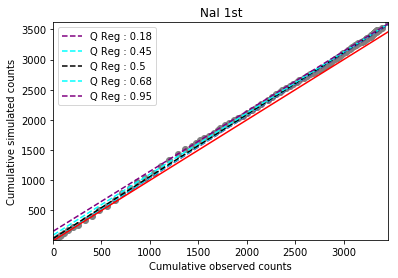

      x     y
0   0.0   6.0
1  13.0  20.0
2  31.0  35.0
3  47.0  48.0
4  63.0  70.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9753
Model:                       QuantReg   Bandwidth:                       17.20
Method:                 Least Squares   Sparsity:                        47.84
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        20:54:00   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3992      5.162      8.989      0.000      36.184      56.615
x              0.9501      0.002    471.034      0.000       0.946       0.954

The condition number is large, 6.25e+03. This 

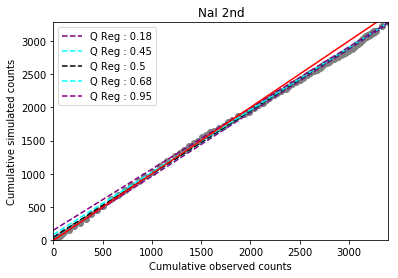

      x     y
0   0.0   6.0
1  13.0  13.0
2  31.0  33.0
3  47.0  54.0
4  63.0  77.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9755
Model:                       QuantReg   Bandwidth:                       14.02
Method:                 Least Squares   Sparsity:                        39.85
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        20:54:02   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.0930      4.300     12.347      0.000      44.583      61.603
x              0.9726      0.002    578.843      0.000       0.969       0.976

The condition number is large, 6.25e+03. This 

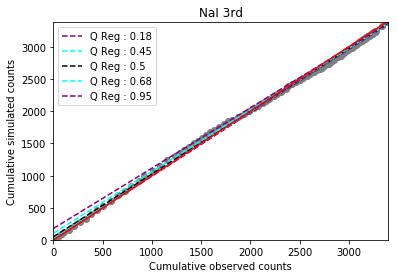

        x       y
0   625.0   761.0
1   818.0   986.0
2  1005.0  1177.0
3  1149.0  1347.0
4  1286.0  1482.0
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9806
Model:                       QuantReg   Bandwidth:                       11.10
Method:                 Least Squares   Sparsity:                        30.28
Date:                Mon, 26 Aug 2019   No. Observations:                  128
Time:                        20:54:03   Df Residuals:                      126
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    196.3166      5.397     36.375      0.000     185.636     206.997
x              1.0270      0.001    698.342      0.000       1.024       1.030

The condition number i

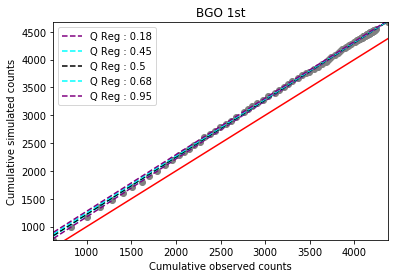

In [37]:
## NAI 1st
data = d1
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 1st")
plt.legend()
plt.show()

## NAI 2nd
data = d2
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 2nd")
plt.legend()
plt.show()



## NAI 3rd

data = d3
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x),1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("NaI 3rd")
plt.legend()
plt.show()


## BGO 1st

data = d4
obs = data['0']
rep = data['1']

x= np.cumsum(obs)
y = np.cumsum(rep)
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"])

print data.head()

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

## Build the model for other quantiles
quantiles = np.array([0.18, 0.45, 0.5, 0.68, 0.95])
print quantiles 
models = []
params = []

for qt in quantiles:
	print qt
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print params

plt.figure(5)
plt.scatter(x, y,  color='grey', )
#plt.plot(x, y_pred2, color='blue',
 #        linewidth=1.5, label='Lin Reg')

y_pred1 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred1, color='purple', linestyle="--",
         linewidth=1.5, label='Q Reg : 0.18')

y_pred2 = models[1].params['Intercept'] + models[1].params['x'] * x
plt.plot(x, y_pred2, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.45')


y_pred3 = models[2].params['Intercept'] + models[2].params['x'] * x
plt.plot(x, y_pred3, color='black',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.5')



y_pred4 = models[3].params['Intercept'] + models[3].params['x'] * x
plt.plot(x, y_pred4, color='cyan',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.68')


y_pred5 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred5, color='purple',linestyle="--",
         linewidth=1.5, label='Q Reg : 0.95')
mid= np.arange(min(x), max(x), 1)
plt.plot(mid, mid, color="red")


#plt.xticks(())
#plt.yticks(())
plt.xlabel("Cumulative observed counts")
plt.ylabel("Cumulative simulated counts")
plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))
plt.title("BGO 1st")
plt.legend()
plt.show()


In [28]:
# get multi synch params

results_reloaded = load_analysis_results("multi_synch.fits")

synch_ene = results_reloaded.get_variates("bn090530760.spectrum.main.synch.scale")
synch_ene_eti = synch_ene.equal_tail_interval(cl=0.68)
synch_ene_hpd = synch_ene.highest_posterior_density_interval(cl=0.68)
synch_ene_median = synch_ene.median 
synch_ene= (synch_ene_median, synch_ene_hpd[0], synch_ene_hpd[1])
synch_ene = np.transpose(synch_ene)


synch_norm = results_reloaded.get_variates("bn090530760.spectrum.main.synch.K")
synch_norm_eti = np.array(synch_norm.equal_tail_interval(cl=0.68))
synch_norm_hpd = np.array(synch_norm.highest_posterior_density_interval(cl=0.68))
synch_norm_median = synch_norm.median 
synch_norm= (synch_norm_median, synch_norm_hpd[0], synch_norm_hpd[1])
synch_norm = np.transpose(synch_norm)

synch_aic = results_reloaded.statistical_measures.AIC
synch_bic = results_reloaded.statistical_measures.BIC
synch_dic = results_reloaded.statistical_measures.DIC

synch_stats = (synch_aic, synch_bic, synch_dic)

#_ = plot_point_source_spectra(results_reloaded,ene_min=1,ene_max=1E3,flux_unit='keV2/(cm2 s keV)')

# evidence for synchrotron

datContent = [i.strip().split() for i in open("chains_synch/fit-stats.dat").readlines()]

ev_synch = datContent[0][5]
ev_synch_err = datContent[0][7]

print ev_synch, "+/-", ev_synch_err

#bayes synch all

columns=['synch_ene_median','synch_ene_hpd_1','synch_ene_hpd_2','synch_norm_median','synch_norm_hpd_1','synch_norm_hpd_2', 'synch_aic', 'synch_bic', 'synch_dic', 'synch_ev', 'synch_ev_err']
smt = np.hstack((synch_ene, synch_norm, synch_aic, synch_bic, synch_dic, ev_synch, ev_synch_err))

df_multisynch = pd.DataFrame(smt.reshape(-1, len(smt)),columns=columns)

pickling_on = open("multisynch.pickle","wb")
pickle.dump(df_multisynch, pickling_on)
pickling_on.close()

-0.206578646783560725E+04 +/- 0.117226926795335348E+00


In [29]:
# write out

In [30]:
# gather all MLE results and write out

mle_all = pd.concat([df_mlecpl,df_mlecoast, df_mlesynch], axis=1)

pickling_on = open("mleall.pickle","wb")
pickle.dump(mle_all, pickling_on)
pickling_on.close()

with open('/Users/monad/Documents/multinest_proj/mle_bitzn.csv', 'a') as f:
    mle_all.to_csv(f)
    
# MLE results

pickle_off = open("mleall.pickle","rb")
df_mleall = pickle.load(pickle_off)
print(df_mleall)

      trigName     cpl_mle_ind_param   cpl_mle_ind_maxerr  \
0  bn090530760  -0.13454660755422884  -0.0558707047712852   

     cpl_mle_ind_minerr cpl_mle_ene_param  cpl_mle_ene_maxerr  \
0  -0.21322251033717246  94.5017008045903  101.71904823544565   

  cpl_mle_ene_minerr  cpl_mle_norm_param  cpl_mle_norm_maxerr  \
0  87.28435337373494  0.1666922934498952  0.21199056517138798   

   cpl_mle_norm_minerr        mle_cpl_aic        mle_cpl_bic  \
0  0.12139402172840241  4056.373750672678  4068.747802151913   

   coast_mle_ene_param  coast_mle_ene_maxerr  coast_mle_ene_minerr  \
0            70.458985             73.158543             67.759426   

   coast_mle_norm_param  coast_mle_norm_maxerr  coast_mle_norm_minerr  \
0              3.357894               3.458532               3.257256   

   mle_coast_aic  mle_coast_bic  synch_mle_ene_param  synch_mle_ene_maxerr  \
0    4052.366395    4060.624496           152.779988             162.37324   

   synch_mle_ene_minerr  synch_mle_norm_p

In [31]:
# get all multinest params together and write out

multi_all = pd.concat([ df_multicpl,  df_multicoast, df_multisynch], axis=1)

pickling_on = open("multiall.pickle","wb")
pickle.dump(multi_all, pickling_on)
pickling_on.close()

with open('/Users/monad/Documents/multinest_proj/multi_bitzn.csv', 'a') as f:
    multi_all.to_csv(f)
    
# multinest results

pickle_off = open("multiall.pickle","rb")
df_multiall = pickle.load(pickle_off)
print(df_multiall)

      trigName     cpl_epk_median      cpl_epk_hpd_1       cpl_epk_hpd_2  \
0  bn090530760  95.13644753097167  84.39288605064111  105.95764807884193   

         cpl_ind_median        cpl_ind_hpd_1          cpl_ind_hpd_2  \
0  -0.14424548277794913  -0.2628793384256285  -0.018102825594991545   

      cpl_norm_median       cpl_norm_hpd_1       cpl_norm_hpd_2  \
0  0.1648480529753932  0.08801949374405987  0.22452762899028675   

             cpl_aic           cpl_bic            cpl_dic  \
0  4049.740532292104  4062.11458377134  4034.092093336236   

                      cpl_ev                cpl_ev_err coast_scale_median  \
0  -0.203818884826848466E+04  0.138508328686427873E+00  70.42274297826833   

   coast_scale_hpd_1  coast_scale_hpd_2   coast_epk_median  \
0  67.63059564576231  73.04343171696227  27.61676195226209   

      coast_epk_hpd_1     coast_epk_hpd_2   coast_norm_median  \
0  26.521802214024436  28.644483026259717  3.3564993254830036   

   coast_norm__hpd_1   coast_norm__